https://pl.wikipedia.org/wiki/Dyskretna_transformacja_kosinusowa

http://grzegorzsokol.name/blog/dct/

https://pl.wikipedia.org/wiki/JPEG

In [2]:
import matplotlib.pyplot as plt

In [3]:
import scipy.fftpack as ff
import math
import numpy as np

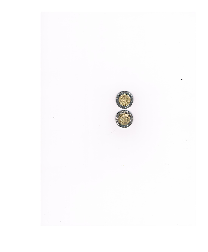

(2338, 1700) float64


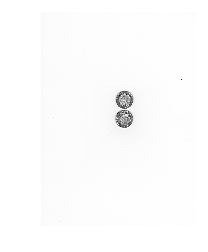

In [4]:
from skimage import io, color

lena = io.imread("../images/001.jpg")

plt.imshow(lena)
plt.axis('off')
plt.show()

lenagray = color.rgb2gray(lena)
print(lenagray.shape, lenagray.dtype)

plt.imshow(lenagray, cmap="gray")
plt.axis('off')
plt.show()

In [5]:
image = lenagray
windowsize = 8

counter = 0
windows = []
for r in range(0,image.shape[0] - windowsize, windowsize):
    for c in range(0,image.shape[0] - windowsize, windowsize):
        windows.append(image[r:r+windowsize,c:c+windowsize])
        counter += 1
        
print(counter)

85264


In [6]:
len(list(range(0,image.shape[0] - windowsize, windowsize)))

292

In [7]:
len(windows)

85264

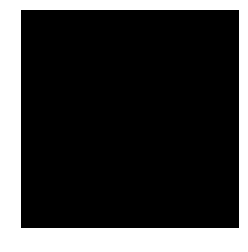

In [8]:
frag = windows[0]

plt.imshow(frag, cmap="gray")
plt.axis('off')
plt.show()

In [9]:
res = ff.dct(ff.dct(frag,norm='ortho').T,norm='ortho').T
np.set_printoptions(suppress=True, precision=2)
print(res)

[[8. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [10]:
res2 = np.round(res[:],2)
bias = .03
# windowsize = 8

counter = 0
for i in range(windowsize):
    for j in range(windowsize):
        if res2[i,j]>-bias and res2[i,j]<bias:
            res2[i,j]=0
            counter += 1
            
print('Liczba modyfikacji: ', counter)
np.set_printoptions(suppress=True, precision=2)
print(res2)

print('Wartości niezerowe: ', np.sum(res2 != 0), ' na ', res2.size)

Liczba modyfikacji:  63
[[8. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
Wartości niezerowe:  1  na  64


In [11]:
orig = ff.idct(ff.idct(res2,norm='ortho').T,norm='ortho').T
print(orig)

[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


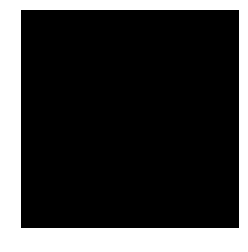

In [12]:
plt.imshow(frag, cmap="gray")
plt.axis('off')
plt.show()

In [13]:
print(np.mean(frag == orig))

0.0


In [14]:
np.set_printoptions(suppress=True, precision=2)
print("%.2f %.2f %.2f" % (np.mean(frag - orig), np.max(frag - orig), np.sum(frag - orig)))

-0.00 -0.00 -0.00


In [15]:
def show2imgs(im1, im2, title1='Obraz pierwszy', title2='Obraz drugi', size=(10,10)):
    
    import matplotlib.pyplot as plt
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=size)
    ax1.imshow(im1, cmap='gray')
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(im2, cmap='gray')
    ax2.axis('off')
    ax2.set_title(title2)
    plt.show()

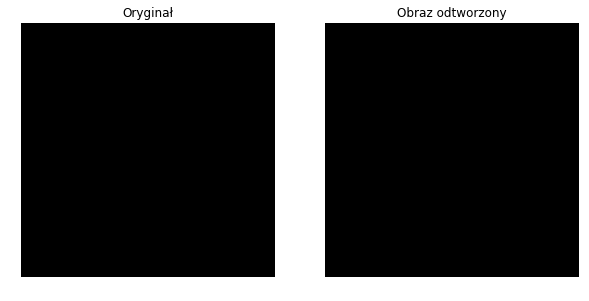

In [16]:
show2imgs(frag, orig, 'Oryginał', 'Obraz odtworzony')